# Rex-Omni Visual Prompting Tutorial

This notebook demonstrates how to use Rex-Omni for visual prompting tasks. Visual prompting allows you to speciy object to be detected in the image using bounding boxes.


## Step 1: Initialize Rex Omni Model


In [1]:
# Import required libraries
import torch
from PIL import Image, ImageDraw
from rex_omni import RexOmniWrapper, RexOmniVisualize
import matplotlib.pyplot as plt
import numpy as np

# Rex-Omni supports both Transformers and VLLM backends by switching the backend parameter.
model_path = "IDEA-Research/Rex-Omni"  # Replace with your model path

print("🚀 Initializing Rex Omni model...")

rex_model = RexOmniWrapper(
    model_path=model_path,
    backend="transformers",  # Choose "transformers" or "vllm"
    max_tokens=2048,
    temperature=0.0,
    top_p=0.05,
    top_k=1,
    repetition_penalty=1.05,
)


🚀 Initializing Rex Omni model...
Initializing transformers backend...


/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-09-30 15:12:15,755] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/usr/bin/ld: cannot find -laio
collect2: error: ld returned 1 exit status
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlopen'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlclose'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlerror'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlsym'
collect2: error: ld returned 1 exit status
Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.22s/it]


## Step 2: Load Image and Define Visual Prompts


✅ Image loaded successfully!
📏 Image size: (2246, 1590)


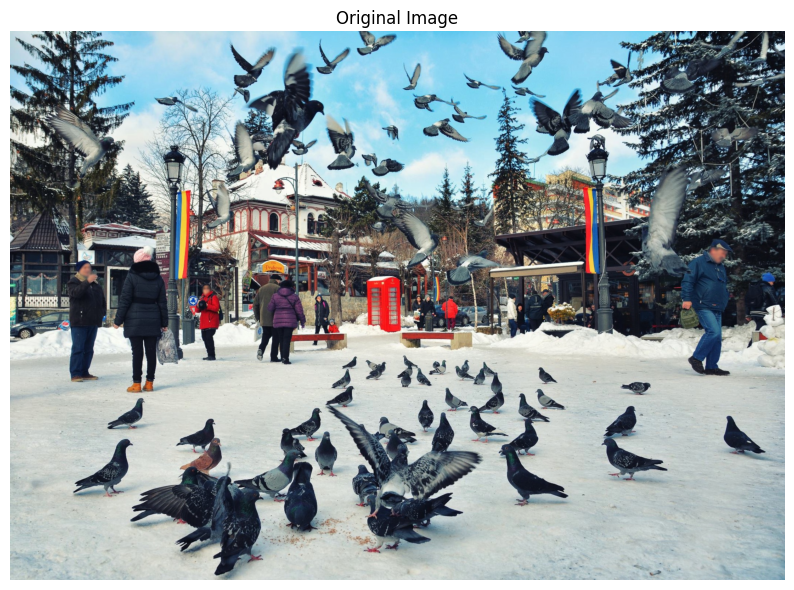

In [2]:
# Load image
image_path = "test_images/pigeons.jpeg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# Display the original image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()


📦 Visual prompt boxes defined:
  Box 1: [644, 1210, 842, 1361] (x1, y1, x2, y2)
  Box 2: [1180, 1066, 1227, 1160] (x1, y1, x2, y2)


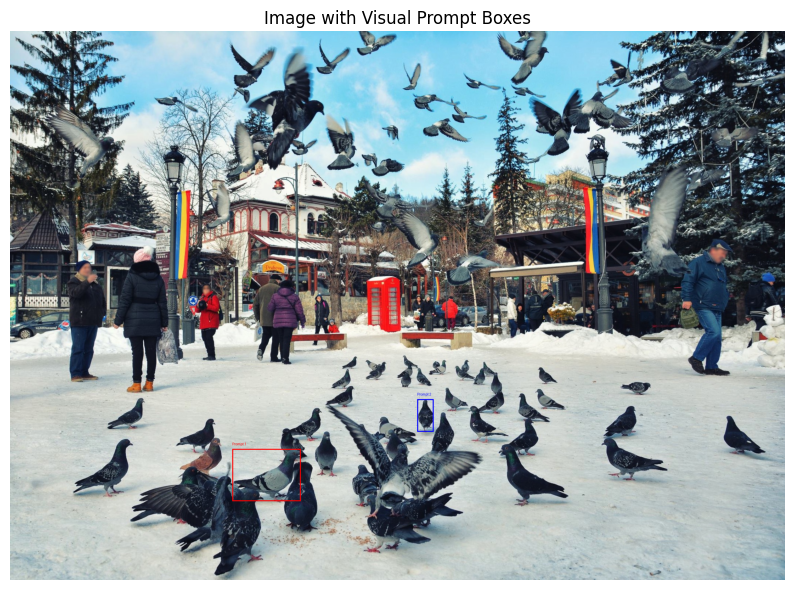

In [3]:
# Define visual prompt boxes (x1, y1, x2, y2) in image coordinates
# These boxes will guide the model's attention to specific regions
visual_prompts = [
    [644, 1210, 842, 1361],
    [1180, 1066, 1227, 1160],  # Box 3: bottom region
]

print("📦 Visual prompt boxes defined:")
for i, box in enumerate(visual_prompts):
    print(f"  Box {i+1}: [{box[0]}, {box[1]}, {box[2]}, {box[3]}] (x1, y1, x2, y2)")

# Visualize the visual prompt boxes on the image
def draw_visual_prompts(image, boxes, colors=None):
    """Draw visual prompt boxes on the image"""
    if colors is None:
        colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
    
    # Create a copy of the image
    vis_image = image.copy()
    draw = ImageDraw.Draw(vis_image)
    
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        color = colors[i % len(colors)]
        
        # Draw rectangle
        draw.rectangle([x1, y1, x2, y2], outline=color, width=3)
        
        # Add label
        draw.text((x1, y1-20), f"Prompt {i+1}", fill=color)
    
    return vis_image

# Draw visual prompts
prompt_vis_image = draw_visual_prompts(image, visual_prompts)

# Display the image with visual prompts
plt.figure(figsize=(10, 8))
plt.imshow(prompt_vis_image)
plt.axis("off")
plt.title("Image with Visual Prompt Boxes")
plt.show()

## Step 3: Perform Visual Prompting Inference


✅ Inference completed!


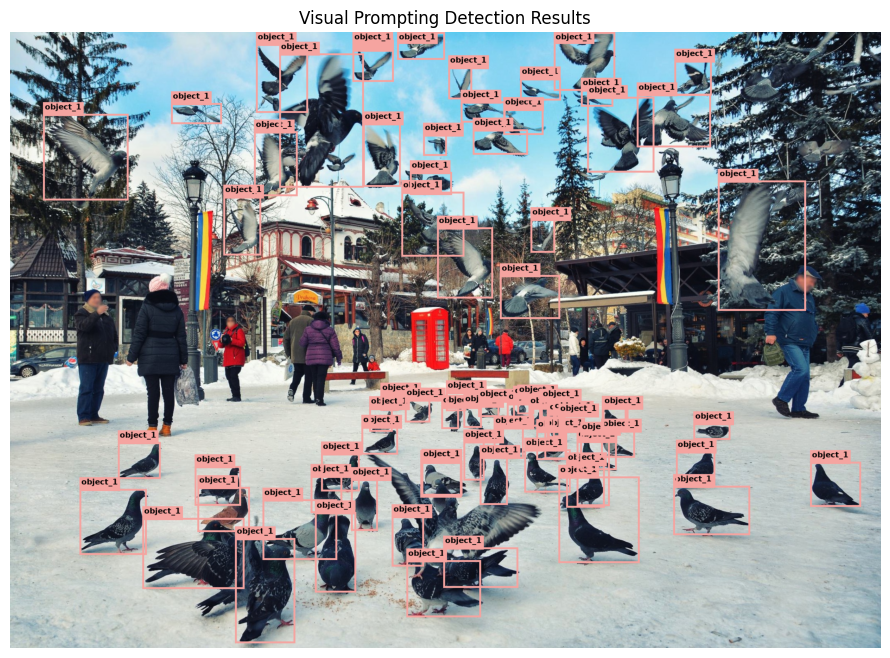

In [ ]:
# Perform inference with visual prompts
results = rex_model.inference(
    images=image,
    task="visual_prompting",
    visual_prompt_boxes=visual_prompts,
)

print("✅ Inference completed!")
# Process and visualize results
result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    # Create visualization with RexOmniVisualize
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=20,
        draw_width=5,
        show_labels=True,
    )
    
    # Display the detection results
    plt.figure(figsize=(12, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("Visual Prompting Detection Results")
    plt.show()
    

else:
    print(f"❌ Inference failed: {result['error']}")

## Example 1: Object Pointing